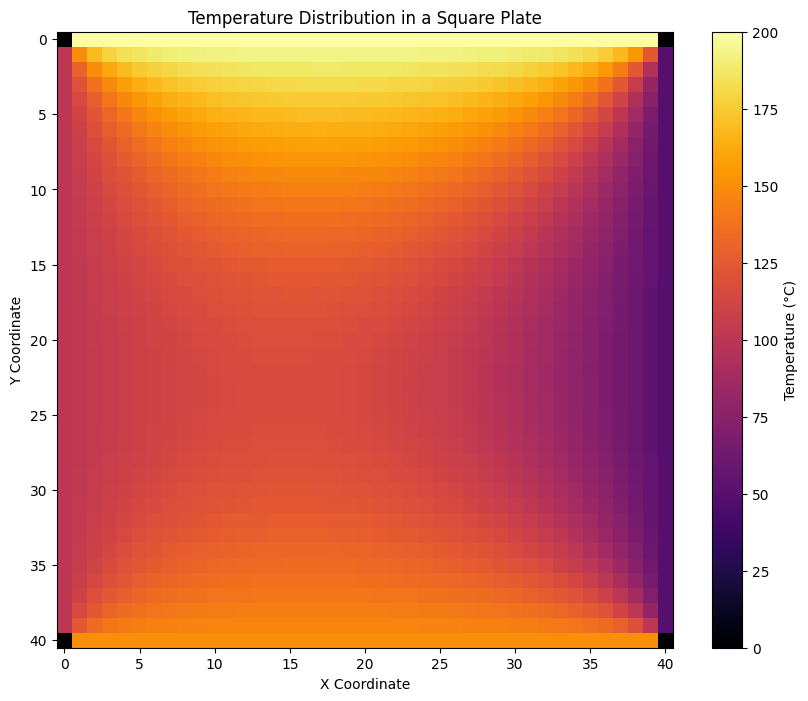

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
n = 41  # Total nodes in one dimension
edge_temperature = {'top': 200, 'bottom': 150, 'left': 100, 'right': 50}  # edge temperatures as in Lab7.pdf (in Celsius)

# Initialize the temperature grid
temperature = np.zeros((n, n))
temperature[1:-1, 0] = edge_temperature['left']     # Left edge without corners
temperature[1:-1, -1] = edge_temperature['right']   # Right edge without corners
temperature[0, 1:-1] = edge_temperature['top']      # Top edge without corners
temperature[-1, 1:-1] = edge_temperature['bottom']  # Bottom edge without corners


def update_temperature(T, n):
    T_new = T.copy()  # creating a copy of the temperature matrix to ensure that all updates are based on the original state
    for i in range(1, n-1):
        for j in range(1, n-1):
            T_new[i, j] = 0.25 * (T[i+1, j] + T[i-1, j] + T[i, j+1] + T[i, j-1])
    return T_new


# Iteratively solve the system using an approximation method
iterations = 1000  # Number of iterations to refine the solution
for _ in range(iterations):
    temperature = update_temperature(temperature, n)

# Plot the temperature distribution
plt.figure(figsize=(10, 8))
plt.imshow(temperature, cmap='inferno', interpolation='nearest')
plt.colorbar(label='Temperature (°C)')
plt.title('Temperature Distribution in a Square Plate')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()